# $\zeta$-Space of Extreme events
------------------------------------------------
This notebook is an example of the $\zeta$-space application over a synthetic Endogenous and Exogenous event. More information about the p-model is presented in [this article](https://proceedings.sbmac.emnuvens.com.br/sbmac/article/view/2874)

In [ ]:
!pip install MFDFA==0.4.1
!pip install git+https://github.com/rsautter/Zeta-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ to /tmp/pip-req-build-enrtfwmz
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-enrtfwmz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=8338 sha256=915ca1ff155b8a0dbf1b3e7914112afb7831635f51b596ceaec52559cae4415a
  Stored in directory: /tmp/pip-ephem-wheel-cache-eciduf53/wheels/db/bc/42/483e13446677140b7bb424768a5a65bef571a830bc8bc11145
Successfully built zetaSpace


In [ ]:
import zeta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

# 1. Generating Endogenous and Exogenous events
-------------------------------------------------------------------

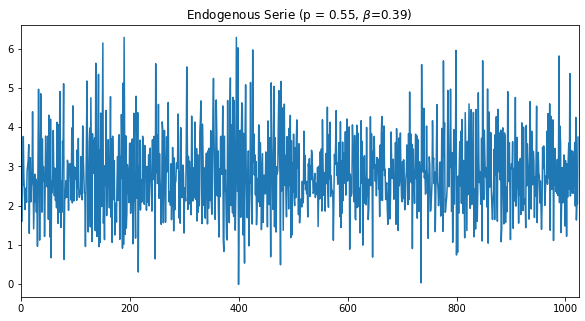

In [ ]:
endo, p, beta = zeta.generateUniformEndo(2**10)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(endo/np.std(endo))
plt.title(r"Endogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(endo))
plt.show()

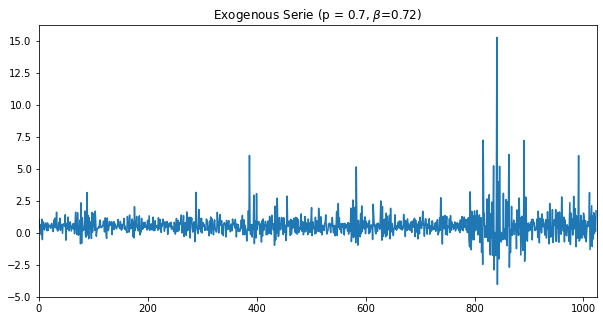

In [ ]:
exo, p, beta = zeta.generateUniformExo(2**10)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(exo/np.std(exo))
plt.title(r"Exogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(exo))
plt.show()

# 2. Power Spectrum and SIngularity Spectrum
-----------------------------------------------------------------

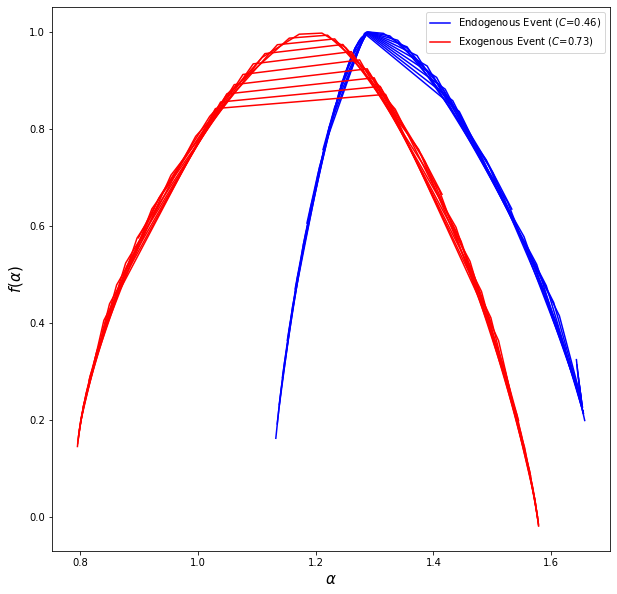

In [ ]:
bas, bfas, w  = zeta.autoMFDFA(endo)
xbas, xbfas, xw  = zeta.autoMFDFA(exo)

plt.figure(figsize=(10,10))
for i in range(len(bas)):
  if i==0:
    plt.plot(bas[i],bfas[i],color='b',label="Endogenous Event ($C$="+str(np.round(w,2))+")")
  else:
    plt.plot(bas[i],bfas[i],color='b')
for i in range(len(xbas)):
  if i == 0:
    plt.plot(xbas[i],xbfas[i],color='r',label="Exogenous Event ($C$="+str(np.round(xw,2))+")")  
  else:
    plt.plot(xbas[i],xbfas[i],color='r')
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)
plt.legend()
plt.show()

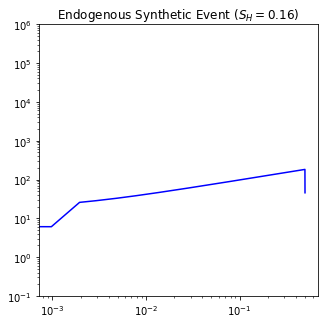

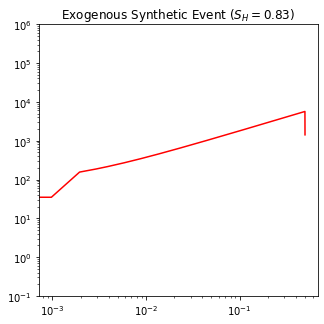

In [ ]:
freqEndo, psdEndo = zeta.getPSD(endo)
freqExo, psdExo = zeta.getPSD(exo)

seq = np.argsort(freqEndo)
specEntr = np.round(zeta.spectralEntropy(endo),2)
plt.figure(figsize=(5,5))
plt.loglog(freqEndo[seq],psdEndo[seq],color='blue')
plt.title(r"Endogenous Synthetic Event ($S_H=$"+str(specEntr)+")")
plt.ylim(10**-1,10**6)

seq = np.argsort(freqExo)
specEntr = np.round(zeta.spectralEntropy(exo),2)
plt.figure(figsize=(5,5))
plt.loglog(freqExo[seq],psdExo[seq],color='red')
plt.title(r"Exogenous Synthetic Event ($S_H=$"+str(specEntr)+")")
plt.ylim(10**-1,10**6)

plt.show()

In [ ]:
print("Endo:")
print(zeta.zetaSpace(endo))
print("Exo:")
print(zeta.zetaSpace(exo))

Endo:
{'spectral_entropy': 0.16251243992381537, 'delta_alpha': 0.4614437518349973}
Exo:
{'spectral_entropy': 0.8261352882179834, 'delta_alpha': 0.734893490142732}


# $\zeta$-space plot
---------------------------------------------------------------

In [ ]:
nSeries = 200
zEndo,zExo = [],[]

for i in tqdm.tqdm(range(nSeries)):
  exo, p, beta = zeta.generateUniformExo(2**13)
  endo, p, beta = zeta.generateUniformEndo(2**13)
  zEndo.append(zeta.zetaSpace(endo))
  zExo.append(zeta.zetaSpace(exo))

zExo = pd.DataFrame(zExo)
zEndo = pd.DataFrame(zEndo)

100%|██████████| 200/200 [14:54<00:00,  4.47s/it]


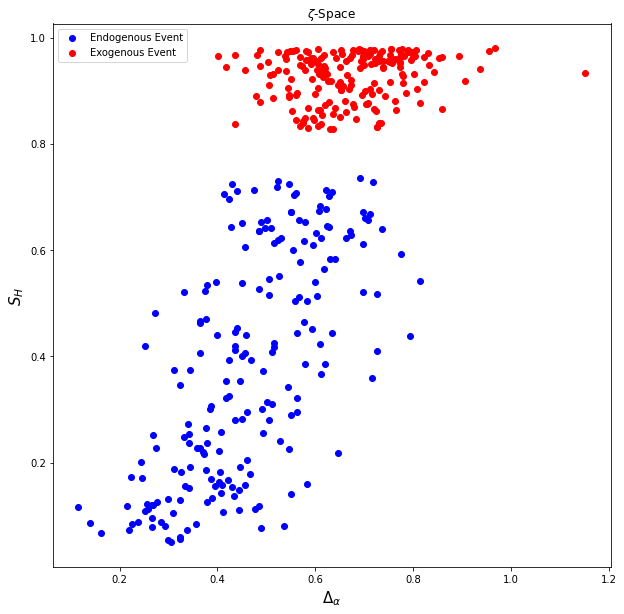

In [ ]:
plt.figure(figsize=(10,10))
plt.title(r"$\zeta$-Space")
plt.scatter(zEndo['delta_alpha'], zEndo['spectral_entropy'],color='blue',label="Endogenous Event")
plt.scatter(zExo['delta_alpha'], zExo['spectral_entropy'],color='red',label="Exogenous Event")
plt.xlabel(r"$\Delta_\alpha$",fontsize=15)
plt.ylabel("$S_H$",fontsize=15)
plt.legend()
plt.show()

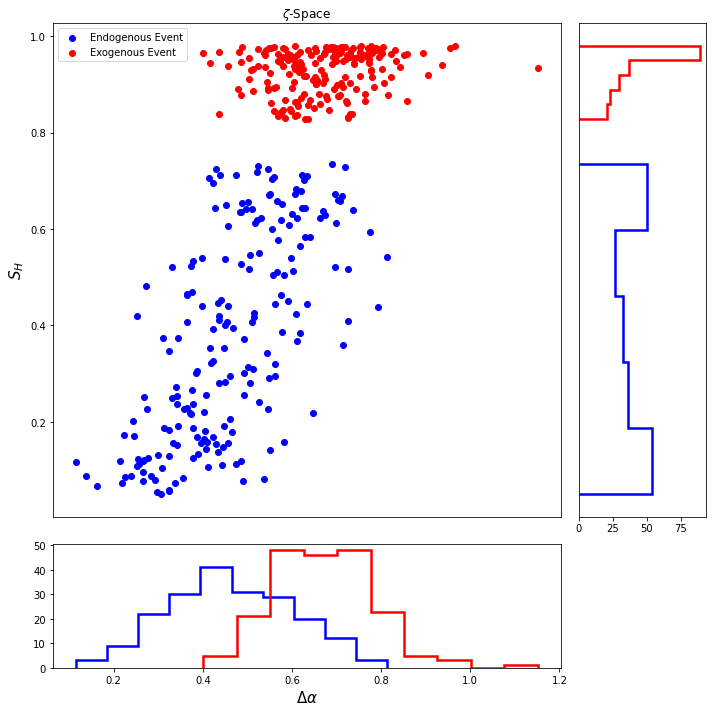

In [ ]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\zeta$-Space")
plt.scatter(zEndo['delta_alpha'], zEndo['spectral_entropy'],color='blue',label="Endogenous Event")
plt.scatter(zExo['delta_alpha'], zExo['spectral_entropy'],color='red',label="Exogenous Event")
plt.ylabel("$S_H$",fontsize=15)
plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(zEndo['spectral_entropy'],color='b',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(zExo['spectral_entropy'],color='r',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(zEndo['delta_alpha'],color='b',histtype='step',lw=2.5)
plt.hist(zExo['delta_alpha'],color='r',histtype='step',lw=2.5)
plt.xlabel(r"$\Delta\alpha$",fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
zExo.to_csv("zExo.csv")
zEndo.to_csv("zEndo.csv")